In [1]:
import pandas as pd
import utils
from time import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

### Load Data and Scaler

In [2]:
from sklearn.externals import joblib
scale = joblib.load("models/scaler.sav")

In [3]:
train = pd.read_csv("data/final_data/clean_train.csv")
X,y,c_names = utils.setup_data(train,scale,'Team2_win',names=True)
train.head()

,Team1_first_downs,Team1_passing_first_downs,Team1_rushing_first_downs,Team1_rushing_yds,Team1_rushing_attempts,Team1_passing_attempts,Team1_passing_completions,Team1_passing_interceptions,Team1_avg_per_pass,Team1_pass_yds,...,Team2_third_down_suc,Team2_fourth_down_attempts,Team2_fourth_down_suc,Team1_third_down_conv_pct,Team2_third_down_conv_pct,Team1_fourth_down_conv_pct,Team2_fourth_down_conv_pct,Team1_turnover_margin,Team2_turnover_margin,Team2_win
0,16,12,2,192,49,12,6,2,3.5,42,...,11,2,2,0.285714,0.578947,0.000000,1.00,2,-2,1
1,23,15,6,304,63,10,7,0,13.7,137,...,4,4,1,0.461538,0.266667,0.000000,0.25,0,0,0
2,35,18,14,277,38,49,27,1,8.1,395,...,5,1,0,0.500000,0.277778,1.000000,0.00,1,-1,0
3,19,13,6,326,49,13,6,0,6.5,85,...,7,3,3,0.416667,0.583333,0.666667,1.00,-1,1,1
4,15,6,6,67,31,35,19,1,3.8,132,...,8,2,1,0.133333,0.500000,0.500000,0.50,0,0,1


In [4]:
test = pd.read_csv("data/final_data/clean_test.csv")
X_test,y_test = utils.setup_data(test,scale,target_col='Team2_win')
test.head()

,Team1_first_downs,Team1_passing_first_downs,Team1_rushing_first_downs,Team1_rushing_yds,Team1_rushing_attempts,Team1_passing_attempts,Team1_passing_completions,Team1_passing_interceptions,Team1_avg_per_pass,Team1_pass_yds,...,Team2_third_down_suc,Team2_fourth_down_attempts,Team2_fourth_down_suc,Team1_third_down_conv_pct,Team2_third_down_conv_pct,Team1_fourth_down_conv_pct,Team2_fourth_down_conv_pct,Team1_turnover_margin,Team2_turnover_margin,Team2_win
0,24,11,9,197,51,24,12,1,7.0,167,...,2,2,0,0.214286,0.166667,0.200000,0.00,1,-1,0
1,17,6,10,109,25,47,16,1,5.8,270,...,5,1,1,0.294118,0.294118,0.333333,1.00,2,-2,1
2,20,15,4,365,58,17,10,0,3.5,60,...,2,1,0,0.266667,0.181818,0.500000,0.00,-2,2,0
3,0,0,0,164,50,23,12,0,7.0,160,...,0,0,0,0.000000,0.000000,0.000000,0.00,-1,1,1
4,25,15,10,265,47,29,20,0,11.1,323,...,6,4,3,0.571429,0.352941,1.000000,0.75,-1,1,0


In [5]:
RF=RandomForestClassifier(n_jobs = -1)
params = {
    'n_estimators' : range(10,500),
    'criterion': ['gini','entropy'],
    'max_depth':range(3,10),
    'min_samples_leaf':range(50,200)
}

In [6]:
random_serach = RandomizedSearchCV(RF,params,cv=10,random_state=10,scoring='accuracy',refit = True)

In [7]:
start = time()
random_serach.fit(X,y)
print("RandomizedSearchCV took %.2f seconds." % ((time() - start)))

RandomizedSearchCV took 67.16 seconds.


In [8]:
import utils
utils.report(random_serach.cv_results_,n_top=10)

Model with rank: 1
Mean validation score: 0.881 (std: 0.023)
Parameters: {'n_estimators': 361, 'min_samples_leaf': 61, 'max_depth': 7, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.880 (std: 0.026)
Parameters: {'n_estimators': 272, 'min_samples_leaf': 55, 'max_depth': 9, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.878 (std: 0.028)
Parameters: {'n_estimators': 487, 'min_samples_leaf': 102, 'max_depth': 6, 'criterion': 'entropy'}

Model with rank: 4
Mean validation score: 0.876 (std: 0.023)
Parameters: {'n_estimators': 451, 'min_samples_leaf': 110, 'max_depth': 4, 'criterion': 'entropy'}

Model with rank: 5
Mean validation score: 0.875 (std: 0.033)
Parameters: {'n_estimators': 255, 'min_samples_leaf': 115, 'max_depth': 4, 'criterion': 'gini'}

Model with rank: 6
Mean validation score: 0.873 (std: 0.024)
Parameters: {'n_estimators': 403, 'min_samples_leaf': 154, 'max_depth': 7, 'criterion': 'gini'}

Model with rank: 7
Mean validation score: 0.871 

In [9]:
RF_final=RandomForestClassifier(**random_serach.best_params_,random_state=10)
RF_final.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=61, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=361, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [10]:
pickle.dump(RF_final,open("models/RF_model.sav",'wb'))

In [11]:
y_pred = RF_final.predict(X_test)
y_pred_prob = RF_final.predict_proba(X_test)[:, 1]

In [12]:
print("RF Acc Score: {0:.3%}".format(accuracy_score(y_test,y_pred)))

RF Acc Score: 86.864%


### Importances/ROC Curve

In [13]:
importances = RF_final.feature_importances_
import numpy as np
std = np.std([RF_final.feature_importances_ for tree in RF_final.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [14]:
feature_importances = pd.DataFrame({'name':c_names.columns,
                                    'importance':RF_final.feature_importances_,
                                   'std':np.std([RF_final.feature_importances_ for tree in RF_final.estimators_],axis=0)})

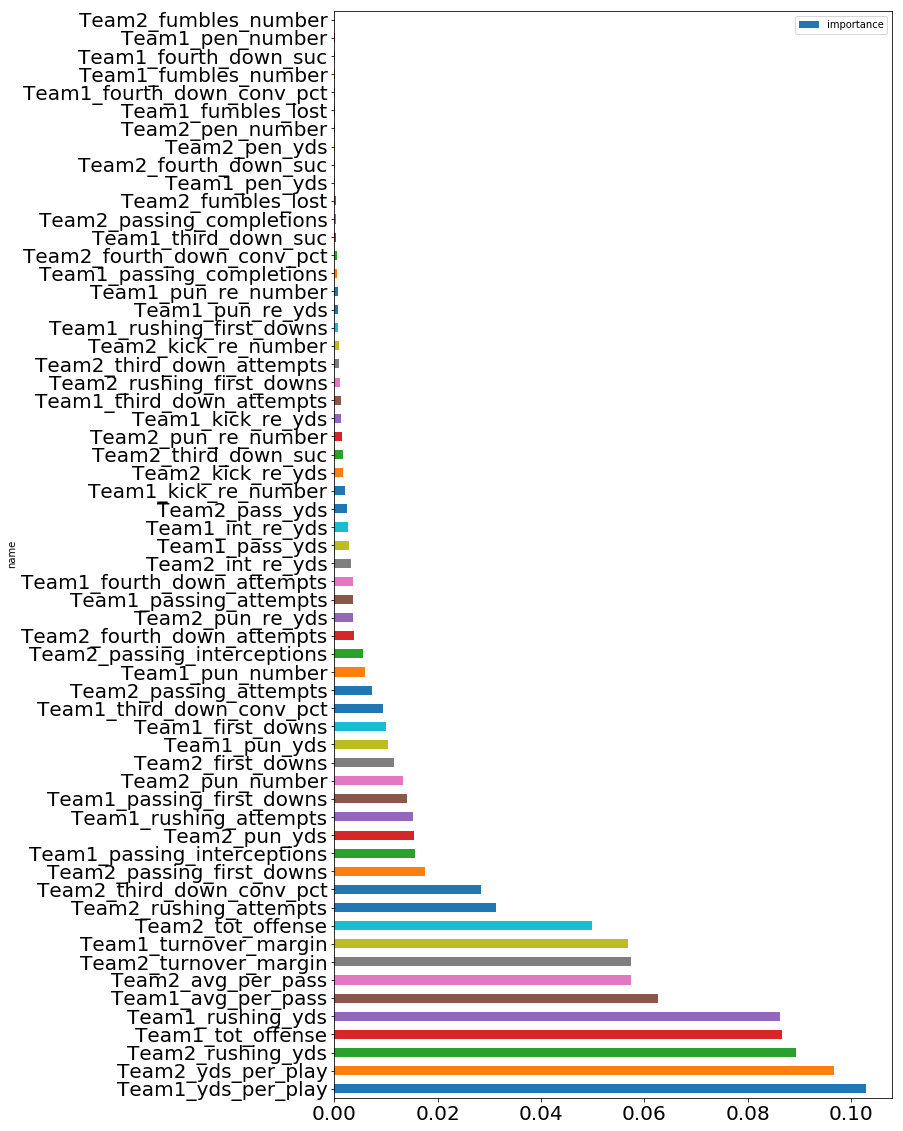

In [15]:
import matplotlib
%matplotlib inline
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)
feature_importances.sort_values('importance',ascending=False).plot(x='name',y='importance',kind='barh',figsize=(10,20))

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = auc(fpr,tpr)

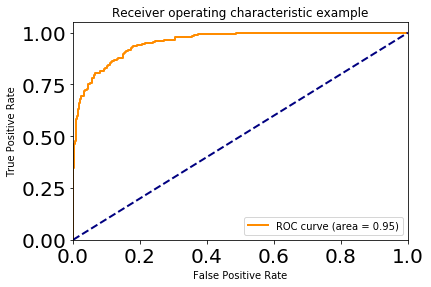

In [17]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [18]:
train.columns.

Index(['Team1_first_downs', 'Team1_passing_first_downs',
       'Team1_rushing_first_downs', 'Team1_rushing_yds',
       'Team1_rushing_attempts', 'Team1_passing_attempts',
       'Team1_passing_completions', 'Team1_passing_interceptions',
       'Team1_avg_per_pass', 'Team1_pass_yds', 'Team1_yds_per_play',
       'Team1_tot_offense', 'Team1_fumbles_number', 'Team1_fumbles_lost',
       'Team1_pen_number', 'Team1_pen_yds', 'Team1_pun_number',
       'Team1_pun_yds', 'Team1_pun_re_number', 'Team1_pun_re_yds',
       'Team1_kick_re_number', 'Team1_kick_re_yds', 'Team1_int_re_yds',
       'Team1_third_down_attempts', 'Team1_third_down_suc',
       'Team1_fourth_down_attempts', 'Team1_fourth_down_suc',
       'Team2_first_downs', 'Team2_passing_first_downs',
       'Team2_rushing_first_downs', 'Team2_rushing_yds',
       'Team2_rushing_attempts', 'Team2_passing_attempts',
       'Team2_passing_completions', 'Team2_passing_interceptions',
       'Team2_avg_per_pass', 'Team2_pass_yds', 'Team